# Shooting Method for Boundary Value Problems
Kaela Nelson

Volume 4

Consider the boundary value problem (BVP) of the form

$$y^{''} = f(x,y, y^{'}), a \leq x \leq b,$$
$$y(a) = \alpha, y^{'}(b) = \beta.$$
 One natural way to approach this problem is to study the initial value problem (IVP) associated with this differential equation:
$$y^{''} = f(x,y, y^{'}), a \leq x \leq b,$$
$$y(a) = \alpha, y^{'}(a) = t.$$

Our goal is to determine an appropriate value $t$ for the initial slope, so that the solution of the IVP is also a solution of the BVP.
Details on the mathematics behind this is found here: http://www.acme.byu.edu/wp-content/uploads/2017/08/ShootingMethod.pdf

In [1]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

## Problem 1
Approximate defined IVPs will usually have a unique solution. BVPs are not so straightforward; they may have no solution or they may have several. You may have to determine which solution is physically interesting. The following BVP has at least two solutions. Using the secant method, find both numerical solutions and their initial slopes/ What initial values $t_0, t_1$ did you use to find them?

$$y^{''} = -4y-9\sin{x}, x \in [0, \pi],$$
$$y(0)=1,$$
$$y(\pi) = 1.$$

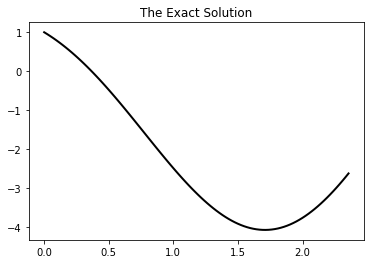

In [2]:
# y'' +4y = -9sin(x), y(0) = 1., y(3*pi/4.) = -(1.+3*sqrt(2))/2., y'(0) = -2 6 
# Exact Solution: y(x) = cos(2x) + (1/2)sin(2x) - 3sin(x)
def find_t(f,a,b,alpha,beta,t0,t1,maxI): 
    sol1 = 0
    i=0
    while abs(sol1-beta) > 10**-8 and i < maxI:
        sol0 = odeint(f, np.array([alpha,t0]), [a,b], atol=1e-10)[1,0] 
        sol1 = odeint(f, np.array([alpha,t1]), [a,b], atol=1e-10)[1,0]
        t2 = t1 - (sol1 - beta)*(t1-t0)/(sol1-sol0) 
        t0 = t1
        t1=t2 
        i = i+1
    if i == maxI:
        print ("t not found")
    return t2

def solveSecant(f,X,a,b,alpha,beta,t0,t1,maxI): 
    t = find_t(f,a,b,alpha,beta,t0,t1,maxI)
    sol = odeint(f,np.array([alpha,t]), X,atol=1e-10)[:,0] 
    return sol

def ode(y,x):
    return np.array([y[1], -4*y[0]-9*np.sin(x)])

X = np.linspace(0,3*np.pi/4,100)
Y = solveSecant(ode,X,0,3*np.pi/4,1,-(1.+3*np.sqrt(2)) /2,(1+(1.+3*np.sqrt(2)) /2)/(-3*np.pi/4),-1,40)
plt.plot(X,Y,'-k',linewidth=2)
plt.title("The Exact Solution")
plt.show()

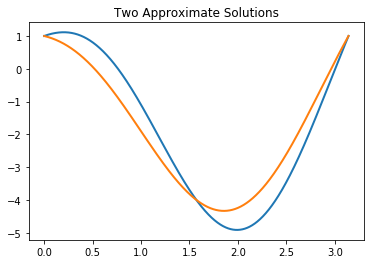

m for t0 = -1.53693608852 : 1.05107799301 
 m for t0 = -2.62132034356 : -0.724906884921


In [3]:
#Problem 1
a = 0
b = np.pi
alpha = 1
beta = 1
X = np.linspace(a,b,10000)
t0 = (1+(1.+3*np.sqrt(2)) /2)/(-3*np.pi/4)
t1 = 1

t0_2 = -(1.+3*np.sqrt(2)) /2
t1_2 = 1
maxI = 40

sol1 = solveSecant(ode, X, a, b, alpha, beta, t0, t1, maxI)
slope1 = (sol1[1] - sol1[0])/(X[1] - X[0])
sol2 = solveSecant(ode, X, a, b, alpha, beta, t0_2, t1_2, maxI)
slope2 = (sol2[1] - sol2[0])/(X[1] - X[0])
plt.title("Two Approximate Solutions")
plt.plot(X,sol1,linewidth=2)
plt.plot(X,sol2,linewidth=2)
plt.show()

print ("m for t0 =", (1+(1.+3*np.sqrt(2)) /2)/(-3*np.pi/4),":", slope1, "\n m for t0 =",-(1.+3*np.sqrt(2)) /2, ":", slope2)

## Problem 2
Use Newton's method to solve the BVP,
$$y^{''} = 3 + \frac{2y}{x^2}, x \in [1, e],$$
$$y(1)=6$$
$$y(e) = e^2 + \frac{6}{e}.$$
Plot your solution. 

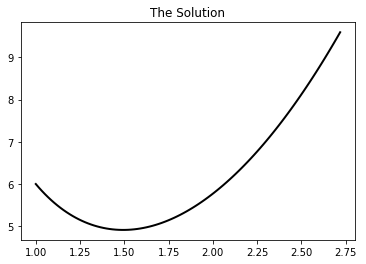

In [5]:
#Problem 2

def new_ode(w,x):
    return np.array([w[1], 3 + 2*w[0]/x**2, w[3], 2*w[2]/x**2])

def newton_find_t(f,a,b,alpha,beta,t0,maxI): 
    sol0 = 0
    i=0
    while abs(sol0-beta) > 10**-8 and i < maxI:
        sol0 = odeint(f, np.array([alpha,t0,0,1]), [a,b], atol=1e-10)[1,0] #y
        sol1 = odeint(f, np.array([alpha,t0,0,1]), [a,b], atol=1e-10)[1,2] #z
        t1 = t0 - (sol0 - beta)/sol1
        t0 = t1
        i = i+1
    if i == maxI:
        print ("t not found")
    return t1

def solveNewton(f,X,a,b,alpha,beta,t0,maxI): 
    t = newton_find_t(f,a,b,alpha,beta,t0,maxI)
    sol = odeint(f,np.array([alpha,t, 0, 1]), X,atol=1e-10)[:,0] 
    return sol

a = 1
b = np.e
zalpha = 6
zbeta = np.e**2 + 6./np.e
maxI = 40
X = np.linspace(1,np.e,100)
Y = solveNewton(new_ode,X,a,b,zalpha, zbeta,t0,maxI)
plt.plot(X,Y,'-k',linewidth=2)
plt.title("The Solution")
plt.show()

## Problem 3
Suppose a projectile is fired from a cannon with velocity $45 \frac{m}{s^2}.$ At what angle should it be fired at to land at a distance of 195 m?

There should be two initial angles than produce a solution for this BVP. Use the secant method to numerically computer and then plot both trajectories.

$$\frac{dy}{dx} = tan\theta,$$
$$\frac{dv}{dx} = -\frac{g\sin\theta + \mu v^2}{v\cos\theta},$$
$$\frac{d\theta}{dx} = -\frac{g}{v^2},$$
$$y(0) = y(195) = 0,$$
$$v(0) = 45\frac{m}{s^2}.$$
(g = $9.8067 \frac{m}{s^2}.$) Find both solutions for this BVP when $\mu=.0003.$ Compare with the solutions when $\mu = 0.$

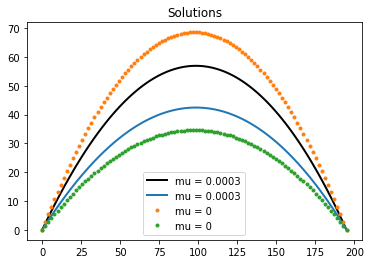

In [6]:
#Problem 3
mu1 = .0003
mu2 = 0
g = 9.8067
a = 0
b = 195
alpha = 0
beta = 0
v0 = 45.
# t0 = (beta - alpha)/(b - a) #pi/4
t0 = np.pi/3.
# t1 = 1 #pi/8
t1 = np.pi/4.

t0_2 = np.pi/5.
t1_2 = np.pi/7.

# t0_2 = 1000
# t1_2 = 1

# grid = np.linspace(0, np.pi/2., 10)

def find_t(f,a,b,alpha,beta,t0,t1,maxI,v0): 
    sol1 = 1
    i=0
    while abs(sol1-beta) > 10**-8 and i < maxI:
        sol0 = odeint(f, np.array([alpha, v0, t0]), [a,b], atol=1e-10)[1,0] 
        sol1 = odeint(f, np.array([alpha, v0, t1]), [a,b], atol=1e-10)[1,0]
        t2 = t1 - (sol1 - beta)*(t1-t0)/(sol1-sol0) 
        t0 = t1
        t1 = t2 
#         print (t2)
        i = i+1
    if i == maxI:
        print ("t not found")
    return t2

def solveSecant(f,X,a,b,alpha,beta,t0,t1,maxI): 
    t = find_t(f,a,b,alpha,beta,t0,t1,maxI,v0)
#     print (t)
    sol = odeint(f,np.array([alpha,v0,t]), X,atol=1e-10)[:,0] 
    return sol

def ode(y, x):
    return np.array([np.tan(y[2]), -(g*np.sin(y[2]) + mu1*y[1]**2)/(y[1]*np.cos(y[2])), -g/y[1]**2])

def ode2(y, x):
    return np.array([np.tan(y[2]), -(g*np.sin(y[2]) + mu2*y[1]**2)/(y[1]*np.cos(y[2])), -g/y[1]**2])

X = np.linspace(a,b,100)
Y = solveSecant(ode,X,a,b,alpha,beta,t0,t1, 40)
Y_2 = solveSecant(ode,X,a,b,alpha,beta,t0_2,t1_2, 40)

Y1 = solveSecant(ode2,X,a,b,alpha,beta,t0,t1, 40)
Y1_2 = solveSecant(ode2,X,a,b,alpha,beta,t0_2,t1_2, 40)

plt.plot(X,Y,'-k',linewidth=2, label = "mu = 0.0003")
plt.plot(X, Y_2, linewidth=2, label = "mu = 0.0003")
plt.plot(X,Y1,".",linewidth=2, label = "mu = 0")
plt.plot(X, Y1_2,".", linewidth=2, label = "mu = 0")
plt.title("Solutions")
plt.legend()
plt.show()